In [66]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [67]:
rawData = pd.read_csv('Google_hangouts_removeBadPackets.csv')

In [68]:
print(rawData)
print("(rows,columns):",rawData.shape)

                                         Flow ID           Src IP  Src Port  \
0       209.148.205.10-131.202.240.87-443-2595-6   209.148.205.10       443   
1        24.156.140.72-131.202.240.87-443-2597-6    24.156.140.72       443   
2        131.202.240.87-24.156.140.72-2597-443-6   131.202.240.87      2597   
3      131.202.240.87-173.194.123.110-2536-443-6   131.202.240.87      2536   
4           31.13.73.7-131.202.240.87-443-2601-6       31.13.73.7       443   
...                                          ...              ...       ...   
54250  131.202.240.242-224.0.0.252-50938-5355-17  131.202.240.242     50938   
54251  131.202.240.242-224.0.0.252-49646-5355-17  131.202.240.242     49646   
54252   131.202.240.87-224.0.0.252-50375-5355-17   131.202.240.87     50375   
54253  131.202.240.87-131.202.243.255-137-137-17   131.202.240.87       137   
54254   131.202.240.87-224.0.0.252-63083-5355-17   131.202.240.87     63083   

                Dst IP  Dst Port  Protocol         

In [69]:
# Get np array by columns
X = rawData.iloc[:,:86].values
Y = rawData.iloc[:,86].values.reshape((rawData.shape[0],1))
m = rawData.shape[0]
# Total length of flow in both direction
X_total_length_flow = np.array(rawData.loc[:,['TotLen Fwd Pkts','TotLen Bwd Pkts','Category']])
# Category and AppProtocol
X_category_AppProtocol = np.array(rawData.loc[:,['Category','App_protocol']])
# 5 tuples (IP,Port,Protocol)
X_five_tuples = np.array(rawData.loc[:,['Src IP','Src Port','Dst IP','Dst Port','Protocol']])
# Src IP and Dst IP
X_src_dst_IP = np.array(rawData.loc[:,['Src IP','Dst IP']])
#print(X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')])

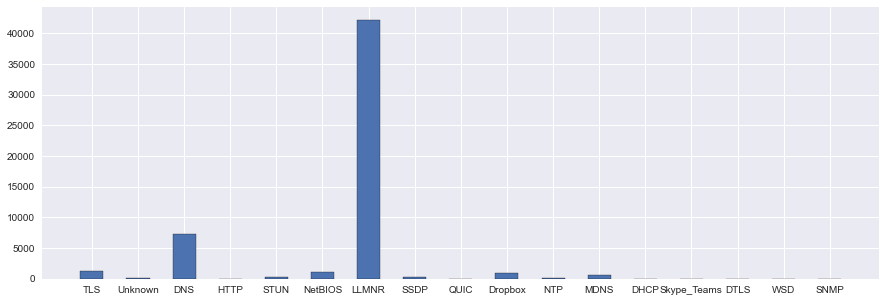

In [43]:
# plot App_protocol
X_AppProtocol = X_category_AppProtocol[:,1].reshape(m,1)
X_appProtocol_labels = np.unique(X_AppProtocol)
fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_AppProtocol,rwidth=0.5,bins=np.arange(-0.5,len(X_appProtocol_labels)),edgecolor='black')

plt.show()

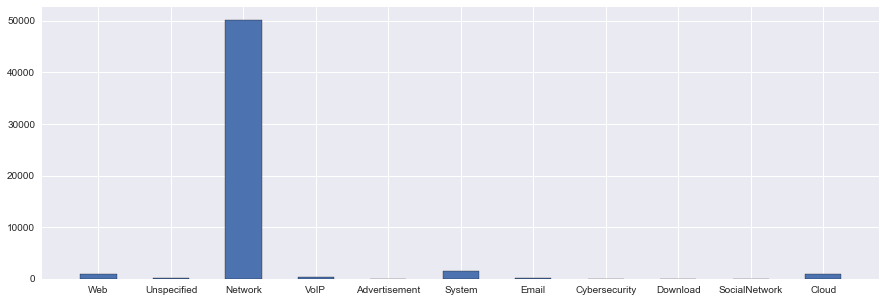

[['Web']
 ['Web']
 ['Web']
 ...
 ['Network']
 ['System']
 ['Network']]


In [158]:
# plot category
plt.style.use('seaborn')

X_category = X_category_AppProtocol[:,0]
X_category = X_category.reshape(X_category.shape[0],1)
x_category_labels = np.unique(X_category)

fig, ax = plt.subplots(figsize=(15,5))

ax.hist(X_category,rwidth=0.5,bins=np.arange(-0.5,len(x_category_labels)),edgecolor='black')

plt.show()

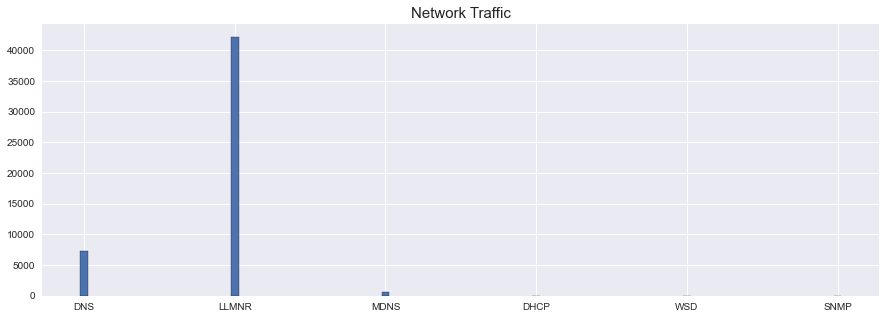

In [45]:
# plot what app protocols the network traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Network')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)



fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.05,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Network Traffic",fontsize=15)
plt.show()

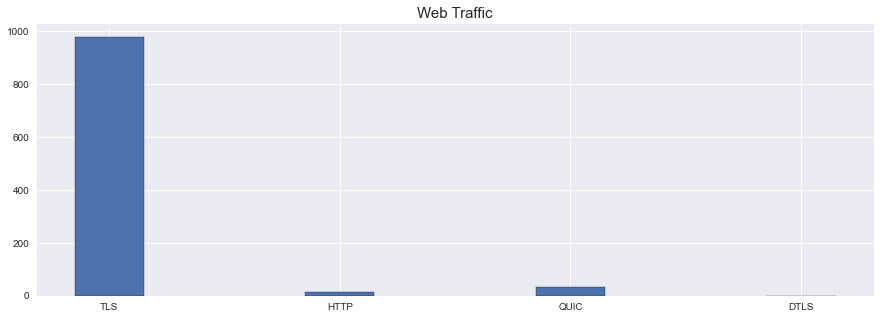

In [46]:
# plot what app protocols the web traffic use
x_network_appProtocol = X_category_AppProtocol[np.where(X_category_AppProtocol[:,0] == 'Web')]
x_network_appProtocol = x_network_appProtocol[:,1]
x_network_appProtocol = x_network_appProtocol.reshape(x_network_appProtocol.shape[0],1)
x_network_app_labels = np.unique(x_network_appProtocol)


fig, ax = plt.subplots(figsize=(15,5))

ax.hist(x_network_appProtocol,rwidth=0.3,bins=np.arange(-0.5,len(x_network_app_labels)),edgecolor='black')
ax.set_title("Web Traffic",fontsize=15)
plt.show()

In [47]:
# normalizing total length of forward and backward flows
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]

m = X_network_length_flow.shape[0]
X_network_length_flow_norm_forward =  X_network_length_flow[:,0] / X_network_length_flow[:,0].max(axis=0)
X_network_length_flow_norm_forward = X_network_length_flow_norm_forward.reshape(m,1)

X_network_length_flow_norm_backward = X_network_length_flow[:,1] / X_network_length_flow[:,1].max(axis=0)
X_network_length_flow_norm_backward = X_network_length_flow_norm_backward.reshape(m,1)

X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm_forward,X_network_length_flow_norm_backward),axis=1)
X_network_length_flow_norm = np.concatenate((X_network_length_flow_norm,X_network_length_flow[:,2].reshape(m,1)),axis=1)

[[38.0 378.0 'Network']
 [32.0 248.0 'Network']
 [36.0 235.0 'Network']
 ...
 [44.0 0.0 'Network']
 [44.0 0.0 'Network']
 [44.0 0.0 'Network']]


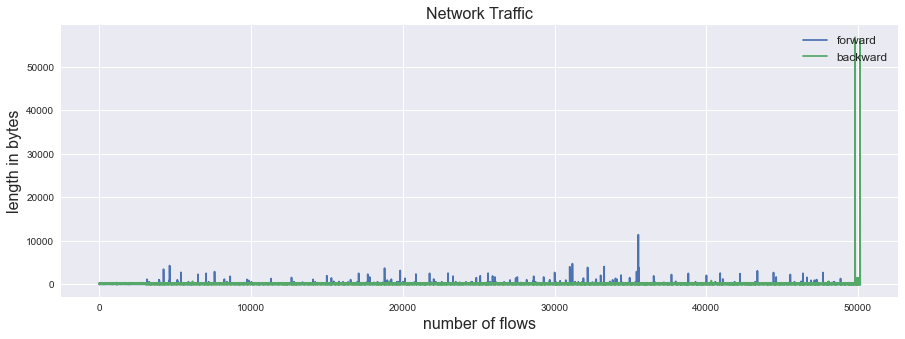

In [48]:
# plot total length of forward and backward flow in network traffic
#X_network_length_flow = X_network_length_flow_norm
X_network_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Network')]
print(X_network_length_flow)
flow = ['forward','backward']

fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_network_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Network Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=12 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

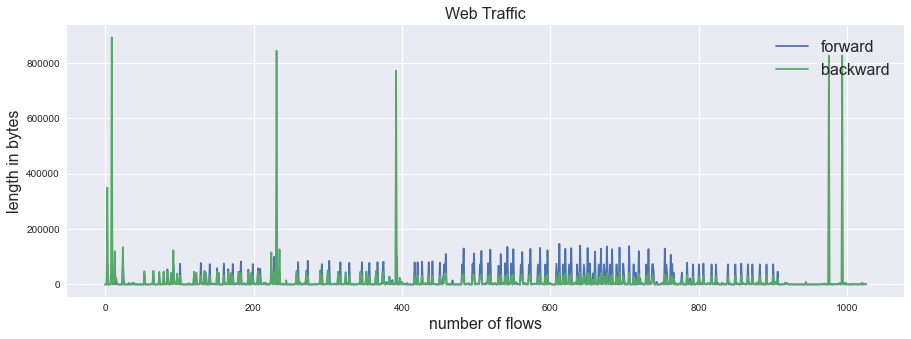

In [49]:
# plot total length of forward and backward flow in web traffic
X_web_length_flow = X_total_length_flow[np.where(X_total_length_flow[:,2] == 'Web')]
fig, ax = plt.subplots(figsize=(15,5))
for i in range(2):
    plt.plot(X_web_length_flow[:,i],label= flow[i])
    
plt.ylabel('length in bytes',fontsize=16)
plt.xlabel('number of flows',fontsize=16)
plt.title('Web Traffic',fontsize=16)
legend = plt.legend(loc='upper right',fontsize=16 ,shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

In [187]:
# Analayzing the network at social level - Popularity of hosts
x_src_ip_port = X_five_tuples[:,:2]
X_dst_ip_port = X_five_tuples[:,2:4]
# remove all 0.0.0.0 ip
X_src_des_ip_remove = X_src_dst_IP[np.where((X_src_dst_IP[:,0] != '0.0.0.0') & (X_src_dst_IP[:,1] != '0.0.0.0') &
                                           (X_src_dst_IP[:,0] != '255.255.255.255') & (X_src_dst_IP[:,1] != '255.255.255.255'))]
count, unique = np.unique(X_src_des_ip_remove,return_counts=True)
unique = unique.reshape(unique.shape[0],1)
count = count.reshape(count.shape[0],1)
X_src_des_ip_count = np.concatenate((unique,count),axis=1)
X_src_des_ip_count = X_src_des_ip_count[X_src_des_ip_count[:,0].argsort()]
print(X_src_des_ip_remove.shape)

(53550, 2)


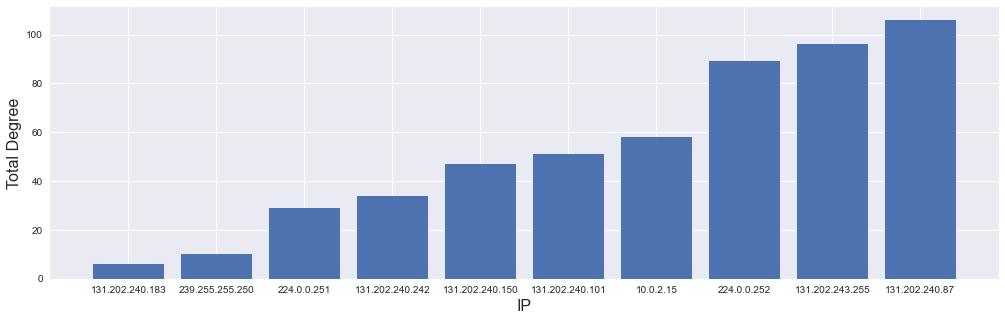

In [188]:
graph = {}
for row in X_src_des_ip_remove:
    if row[0] not in graph:
        graph[row[0]] = {'in':set(),'out':set()}
        
    if row[1] not in graph[row[0]]['out']:
        graph[row[0]]['out'].add(row[1])
    
    if row[1] not in graph:
        graph[row[1]] = {'in':set(),'out':set()}
    
    if row[0] not in graph[row[1]]['in']:
        graph[row[1]]['in'].add(row[0])

X_src_des_degree_count = []
for row in X_src_des_ip_count:
    if row[1] in graph:
        r = np.insert(row,1,len(graph[row[1]]['in']))
        r = np.insert(r,2,len(graph[row[1]]['out']))
        r = np.insert(r,3,len(graph[row[1]]['in']) + len(graph[row[1]]['out']))
        X_src_des_degree_count.append(r)
        
# 0: occurrence, 1: in_degree, 2: out_degree, 3: total degree, 4: ip     
X_src_des_degree_count = np.array(X_src_des_degree_count)
# sort by total degree
X_src_des_degree_count = X_src_des_degree_count[X_src_des_degree_count[:,3].argsort()]

# dimension
degree_count_m = X_src_des_degree_count.shape[0]
degree_count_n = X_src_des_degree_count.shape[1]

# Get 10 most popular IPs
X_src_des_degree_count_10 = X_src_des_degree_count[degree_count_m - 10:]
fig, ax = plt.subplots(figsize=(17,5))
plt.bar(X_src_des_degree_count_10[:,4],X_src_des_degree_count_10[:,3],align='center')
plt.xlabel('IP',fontsize=16)
plt.ylabel('Total Degree',fontsize=16)

plt.show()